# In this notebook we will be doing a quality check and quality assurance

In [20]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)


In [21]:
import pandas as pd

covari_path = 'data/modified/data_clean_covari.csv'
#using pandas to read in as a df
covari = (pd.read_csv(covari_path,parse_dates=[0]))


#taking a peak at the data
covari.head(3)


,time,cruise,lat,lon,abundance_pro,abundance_syn,abundance_pico,abundance_croco,biomass_pro,biomass_syn,...,sss,sst,ugos,vgos,Fe,O2,NO3,PO4,Si,hours_since_sunrise
0,2015-05-22 22:00:00,KM1508,21.343400,-158.273700,135.216812,2.021318,1.456863,0.006307,4.024661,0.337763,...,34.571716,25.653118,0.005764,-0.132531,0.000088,216.794167,4.269278e-07,0.345151,9.464704,6.129444
1,2015-05-22 23:00:00,KM1508,21.343533,-158.273744,136.856649,2.437622,1.774607,0.007009,4.167834,0.413687,...,34.571716,25.653118,0.005764,-0.132531,0.000088,216.794167,4.269278e-07,0.345151,9.464704,7.129444
2,2015-05-23 00:00:00,KM1508,21.346175,-158.274150,130.873523,3.810792,2.018130,0.006307,4.654360,0.654208,...,34.609317,25.646243,-0.002256,-0.132022,0.000088,216.794167,4.269278e-07,0.345151,9.464704,8.129722


In [22]:
covari.sort_values(by='lon')

,time,cruise,lat,lon,abundance_pro,abundance_syn,abundance_pico,abundance_croco,biomass_pro,biomass_syn,...,sss,sst,ugos,vgos,Fe,O2,NO3,PO4,Si,hours_since_sunrise
2295,2019-11-16 01:00:00,SR1917,32.203021,-179.855041,273.865732,2.495027,2.671753,0.010396,13.244360,0.451913,...,34.715550,21.209995,0.149336,0.090397,0.000078,0.000078,0.000078,0.000078,0.000078,6.529444
2296,2019-11-16 02:00:00,SR1917,32.292530,-179.616543,260.155363,2.556641,2.567034,0.010393,15.304261,0.539696,...,34.742513,21.319578,0.147365,0.095294,0.000076,0.000076,0.000076,0.000076,0.000076,7.542500
2297,2019-11-16 03:00:00,SR1917,32.349721,-179.464036,277.320138,2.058131,1.760152,0.010395,15.559046,0.393512,...,34.742513,21.319578,0.147365,0.095294,0.000077,0.000077,0.000077,0.000077,0.000077,8.550833
2298,2019-11-16 05:00:00,SR1917,32.477645,-179.122595,270.773318,1.919884,1.947656,0.010397,15.600850,0.353630,...,34.753625,21.432078,0.182438,0.064169,0.000079,0.000079,0.000079,0.000079,0.000079,10.569722
2299,2019-11-16 06:00:00,SR1917,32.562979,-178.894522,298.368478,1.673314,1.475842,0.010393,13.579954,0.318471,...,34.753625,21.432078,0.182438,0.064169,0.000077,0.000077,0.000077,0.000077,0.000077,11.582222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,2019-11-15 20:00:00,SR1917,31.864758,179.245854,292.949280,3.123414,3.097439,0.010394,11.368028,0.471707,...,34.729141,21.282495,0.159910,0.039083,0.000079,0.000079,0.000079,0.000079,0.000079,1.479722
2291,2019-11-15 21:00:00,SR1917,31.923746,179.402402,293.442227,3.063310,2.557374,0.013861,12.125134,0.499156,...,34.755105,21.091871,0.142448,0.058590,0.000080,0.000080,0.000080,0.000080,0.000080,2.488333
2292,2019-11-15 22:00:00,SR1917,32.020517,179.659504,281.157071,2.988548,2.822228,0.010395,12.304627,0.484656,...,34.778767,21.125551,0.137889,0.071147,0.000078,0.000078,0.000078,0.000078,0.000078,3.502500
2293,2019-11-15 23:00:00,SR1917,32.058154,179.759501,295.299569,2.961981,2.405964,0.010393,13.632337,0.496277,...,34.778767,21.125551,0.137889,0.071147,0.000079,0.000079,0.000079,0.000079,0.000079,4.508056


## looking for relationshiops between all variables

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

corr_matrix = covari[covari.columns.difference(['time', 'cruise', 'abundance_pro', 'biomass_pro', 'lat', 'lon'])]
# Calculate and annotate p-values
p_values = np.zeros_like(corr_matrix)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr, p_value = pearsonr(corr_matrix[corr_matrix.columns[i]], corr_matrix[corr_matrix.columns[j]])
        p_values[i, j] = p_value
        p_values[j, i] = p_value


In [24]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues
covari_floats = covari[covari.columns.difference(['time', 'cruise','lat', 'lon', 'salin'])]
calculate_pvalues(covari_floats)[:20] 


,ALK,Fe,NO3,O2,PO4,Si,abundance_croco,abundance_pico,abundance_pro,abundance_syn,biomass_croco,biomass_pico,biomass_pro,biomass_syn,hours_since_sunrise,sss,sst,ugos,vgos
ALK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.617,0.0,0.0,0.0046,0.578
Fe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0,0.8903,0.2929,0.037,0.0,0.0015,0.0002
NO3,0.0,0.0,0.0,0.0,0.0,0.0,0.6976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1425,0.0,0.0,0.0058,0.0122
O2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3566,0.077,0.0,0.0237,0.0
PO4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1683,0.0,0.0,0.9591,0.0008
Si,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3393,0.0268,0.0,0.2232,0.0
abundance_croco,0.0,0.0,0.6976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0006,0.0,0.8319,0.0,0.0,0.0878,0.0807
abundance_pico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0764,0.0,0.0,0.0,0.6069
abundance_pro,0.0,0.0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5805,0.0,0.0,0.0474,0.709
abundance_syn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4301,0.0,0.0,0.4042,0.5477


In [25]:
covari_floats.dtypes

ALK                    float64
Fe                     float64
NO3                    float64
O2                     float64
PO4                    float64
Si                     float64
abundance_croco        float64
abundance_pico         float64
abundance_pro          float64
abundance_syn          float64
biomass_croco          float64
biomass_pico           float64
biomass_pro            float64
biomass_syn            float64
hours_since_sunrise    float64
sss                    float64
sst                    float64
ugos                   float64
vgos                   float64
dtype: object

In [26]:
def heat_map_correlation(df=covari):
    """
    This function takes a dataframe and makes a correlation hatmap of all the variables.
    The results allows us to determine which varaibles are most correlated with eachother.
    And if two or more variables are HIGHLY correlated we will remove them from the dataframe as it would
    be redundant in the random forest models to include them.
    """
    import seaborn as sns
    covari_floats = covari[covari.columns.difference(['time', 'cruise', 'lat', 'lon', 'salin'])]


    corr = sns.heatmap(covari_floats.corr().abs(),
                    xticklabels=covari_floats.columns,
                    yticklabels=covari_floats.columns)
    
    plt.xticks(rotation=45, ha='right') #roating the xticks to make it easier to read
    plt.show()
    return

    

### Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interaction

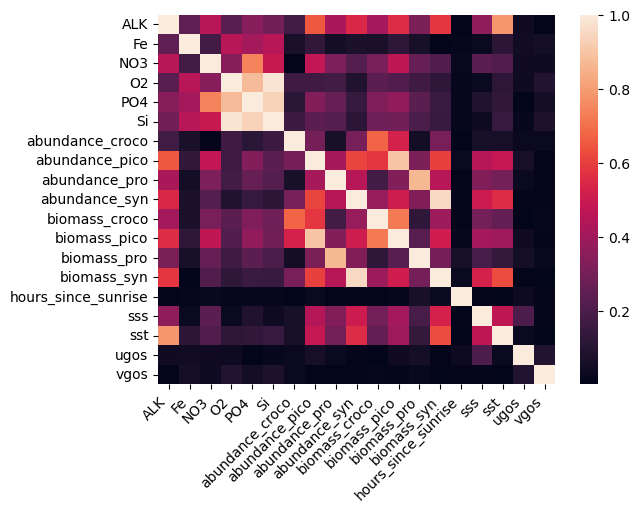

In [27]:
heat_map_correlation()

/Users/bakervanb/anaconda3/envs/machine-learning-env/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


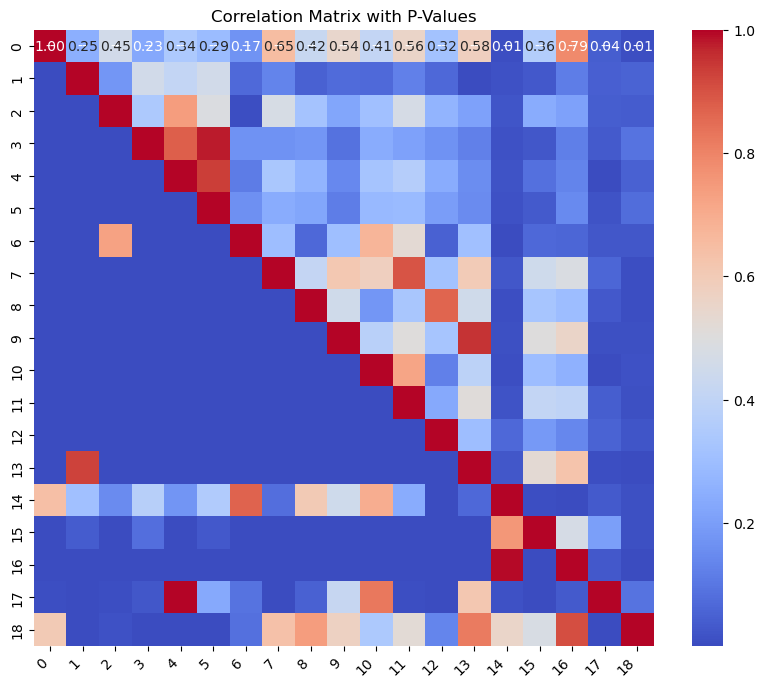

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

covari_floats = covari[covari.columns.difference(['time', 'cruise', 'lat', 'lon', 'salin'])]

# Calculate the correlation matrix
corr_matrix = covari_floats.corr().abs()

# Calculate p-values for each pair of variables
num_vars = len(covari_floats.columns)
p_values = np.zeros((num_vars, num_vars))
for i in range(num_vars):
    for j in range(i + 1, num_vars):
        corr, p_value = pearsonr(covari_floats[covari_floats.columns[i]], covari_floats[covari_floats.columns[j]])
        p_values[i, j] = p_value
        p_values[j, i] = p_value

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Annotate p-values on the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(p_values, ax=ax, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=False)

# Customize plot
plt.title("Correlation Matrix with P-Values")
plt.xticks(rotation=45, ha='right')
plt.show()

# Save the plot to a file if needed
# plt.savefig("/figures/validation/correlation_plot.png")


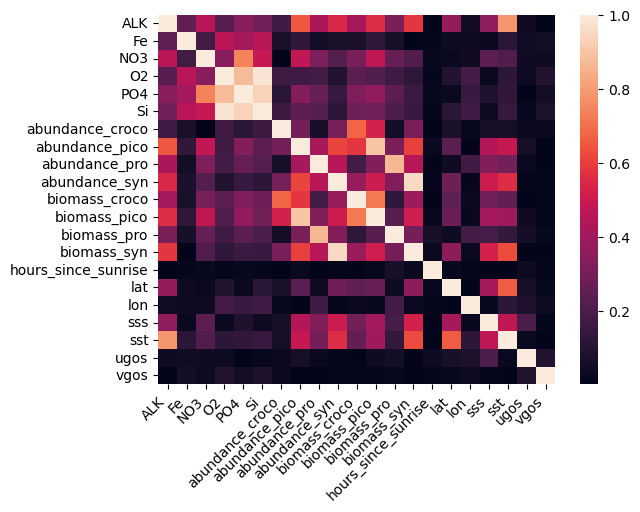

In [29]:
import seaborn as sns
covari_floats = covari[covari.columns.difference(['time', 'cruise', 'population'])]


corr = sns.heatmap(covari_floats.corr().abs(),
                xticklabels=covari_floats.columns,
                yticklabels=covari_floats.columns)
plt.xticks(rotation=45, ha='right') #roating the xticks to make it easier to read
plt.show()

#corr.figure.savefig("/figures/validation/correlation_plot.png")


## What variables are most related? 

### Dropping DOP, DOFe, DON, POFe, POSi, PON as they are the most correlated features.

In [30]:
covari_corr = covari_floats.corr().abs().unstack()
covari_corr = covari_corr.sort_values(kind="quicksort")

bads = covari_corr[covari_corr.between(0.80, 0.9999)]
bads.tail(60)

#covari.drop(['DOP', 'DOFe', 'DON', 'POFe', 'POSi', 'PON'], axis=1, inplace=True)

biomass_pro     abundance_pro     0.867138
abundance_pro   biomass_pro       0.867138
O2              PO4               0.876137
PO4             O2                0.876137
biomass_pico    abundance_pico    0.896660
abundance_pico  biomass_pico      0.896660
PO4             Si                0.934334
Si              PO4               0.934334
biomass_syn     abundance_syn     0.951774
abundance_syn   biomass_syn       0.951774
O2              Si                0.980347
Si              O2                0.980347
dtype: float64



## Saving machine learning ready dataset

In [31]:
covari.to_csv('data/modified/RF_ready_covari.csv', index=False)